In [163]:
import cv2
import matplotlib.pyplot as plt
from scipy import stats
image = cv2.imread('./image.png')


## FIND ENTROY IMAGE ##

True

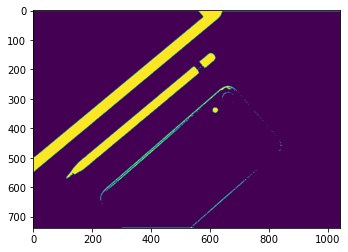

In [164]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
cv2.imwrite('image_thres1.jpg', thresh)

## FIND VOLUME IN IMAGE ##

h =>  720
w =>  1024
all volumns =>  737280
pixels using =>  684015
using =>  92.78 %


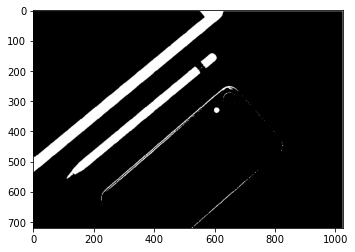

In [165]:
img_cv2_bit = cv2.imread('./image_thres1.jpg')
resize_img = cv2.resize(img_cv2_bit, (1024,720), interpolation=cv2.INTER_NEAREST)
plt.imshow(resize_img)

height_image_bit = resize_img.shape[0]
width_image_bit = resize_img.shape[1]

print("h => ",height_image_bit)
print("w => ",width_image_bit)
print("all volumns => ",width_image_bit * height_image_bit)
volumns_img= width_image_bit * height_image_bit
counting_white = 0

for i in range(height_image_bit):
        for j in range(width_image_bit):
                set_img = resize_img[i, j]
                r_c = set_img[0]
                g_c = set_img[1]
                b_c = set_img[2]
                if r_c <= 125 and g_c <= 125 and b_c <= 125:
                        counting_white += 1

print("pixels using => ", counting_white)
percent_of_use = round((counting_white/volumns_img) * 100, 2)
print("using => ", percent_of_use ,"%")


## SD OF IMAGE ##

In [166]:
resize_img_sd = cv2.resize(image, (1024,720), interpolation=cv2.INTER_NEAREST)
height_resize_img_sd = resize_img_sd.shape[0]
weight_resize_img_sd = resize_img_sd.shape[1]

list_of_pixel_img = []

for i in range(height_resize_img_sd):
    for j in range(weight_resize_img_sd):
        set_rgb_img = resize_img_sd[i, j]
        avg_pixel = stats.trim_mean(set_rgb_img,0)
        list_of_pixel_img.append(avg_pixel)
        

trim_of_mean = round(stats.tstd(list_of_pixel_img))
print("Standard Deviation",trim_of_mean)

Standard Deviation 55


## SHAPE OF OBJECT ##

True

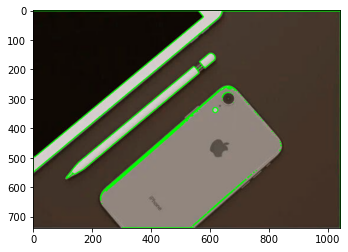

In [167]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_copy)
cv2.imwrite('contours_none_image1.jpg', image_copy)
